## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import regex as re
import emoji
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import seaborn as sns
import csv
from chardet import detect
from spellchecker import SpellChecker
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\casti\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\casti\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## Reading Dataset

In [2]:
dataset = pd.read_csv('Datasets/PreElection.csv')

## Understanding the Data

In [3]:
dataset.head()

,Tweet,Username,Date
0,A year ago! Any progress from the winning cand...,youth4climatePH,5/5/2022
1,"Bongbong Marcos, Sara Duterte express deepest ...",BayanihanToday,5/4/2022
2,I decide I only vote for\rBBM❤️ SARA DUTERTE💚 ...,pjmscheesecake_,5/7/2022
3,Mr. Bbm and Ms. Sara Duterte are obviously wil...,Wonderwomanneph,5/4/2022
4,THE CROWD IS INSANE. BBM YOULL FOREVER BE INSA...,queen_pinksss,5/7/2022


In [4]:
dataset.shape

(5011, 3)

In [5]:
dataset.dtypes

Tweet       object
Username    object
Date        object
dtype: object

In [6]:
dataset.describe()

,Tweet,Username,Date
count,5011,5011,5011
unique,3959,2483,13
top,"Kung walang mabuting kandidato, pwede bang mag...",ABSCBNNews,5/5/2022
freq,7,172,928


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5011 entries, 0 to 5010
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Tweet     5011 non-null   object
 1   Username  5011 non-null   object
 2   Date      5011 non-null   object
dtypes: object(3)
memory usage: 117.6+ KB


In [8]:
dataset.isna().sum()

Tweet       0
Username    0
Date        0
dtype: int64

## Data Cleaning

In [9]:
#Raw Dataset
dataset

,Tweet,Username,Date
0,A year ago! Any progress from the winning cand...,youth4climatePH,5/5/2022
1,"Bongbong Marcos, Sara Duterte express deepest ...",BayanihanToday,5/4/2022
2,I decide I only vote for\rBBM❤️ SARA DUTERTE💚 ...,pjmscheesecake_,5/7/2022
3,Mr. Bbm and Ms. Sara Duterte are obviously wil...,Wonderwomanneph,5/4/2022
4,THE CROWD IS INSANE. BBM YOULL FOREVER BE INSA...,queen_pinksss,5/7/2022
...,...,...,...
5006,Volunteers from NAMFREL-KABALIKAT Bulacan obse...,Namfrel,5/6/2022
5007,NAMFREL Agusan del Norte observed the delivery...,Namfrel,5/5/2022
5008,NAMFREL Lanao del Sur observed the Final Testi...,Namfrel,5/5/2022
5009,RED ALERT | The Cordillera Regional Disaster R...,PIA_Cordillera,5/5/2022


In [10]:
#1 Drop unnecessary columns

dataset.drop(['Date','Username'], axis=1, inplace=True)
dataset

,Tweet
0,A year ago! Any progress from the winning cand...
1,"Bongbong Marcos, Sara Duterte express deepest ..."
2,I decide I only vote for\rBBM❤️ SARA DUTERTE💚 ...
3,Mr. Bbm and Ms. Sara Duterte are obviously wil...
4,THE CROWD IS INSANE. BBM YOULL FOREVER BE INSA...
...,...
5006,Volunteers from NAMFREL-KABALIKAT Bulacan obse...
5007,NAMFREL Agusan del Norte observed the delivery...
5008,NAMFREL Lanao del Sur observed the Final Testi...
5009,RED ALERT | The Cordillera Regional Disaster R...


In [11]:
#Get the exact duplicate tweets in the dataframe
print("Duplicate Tweets:", len(dataset['Tweet'])-len(dataset['Tweet'].drop_duplicates()))

Duplicate Tweets: 1052


In [12]:
dups = dataset["Tweet"]
dups_listed = dataset[dups.isin(dups[dups.duplicated()])].sort_values("Tweet")
print(dups_listed)

                                                  Tweet
3546    @biancadava\rLOOK: Members of the deaf commu...
4578    @biancadava\rLOOK: Members of the deaf commu...
3681    @mommydotsorry\r#Halalan2022 #UniteamBBMSara...
4212    @mommydotsorry\r#Halalan2022 #UniteamBBMSara...
4579    @nujp\rThis elections, never forget those wh...
...                                                 ...
4077  🚨 How the Marcos campaign uses the simple slog...
3790  🚨HALALAN 2022 ADVICE🚨\rplease! wag kayong papa...
565   🚨HALALAN 2022 ADVICE🚨\rplease! wag kayong papa...
110   🧵on 🇹🇼#Halalan2022| I’m sorry for failing y’al...
784   🧵on 🇹🇼#Halalan2022| I’m sorry for failing y’al...

[1788 rows x 1 columns]


In [13]:
# 2 Remove Exact Duplicate Tweets
# Drop the last duplicate and keep the first one
# Reset column index

dataset.drop_duplicates(subset='Tweet', keep="first", inplace=True)
dataset = dataset.reset_index()

In [14]:
# Drop old index column
dataset.drop(['index'], axis=1, inplace=True)
dataset

,Tweet
0,A year ago! Any progress from the winning cand...
1,"Bongbong Marcos, Sara Duterte express deepest ..."
2,I decide I only vote for\rBBM❤️ SARA DUTERTE💚 ...
3,Mr. Bbm and Ms. Sara Duterte are obviously wil...
4,THE CROWD IS INSANE. BBM YOULL FOREVER BE INSA...
...,...
3954,Volunteers from NAMFREL-KABALIKAT Bulacan obse...
3955,NAMFREL Agusan del Norte observed the delivery...
3956,NAMFREL Lanao del Sur observed the Final Testi...
3957,RED ALERT | The Cordillera Regional Disaster R...


In [15]:
# Get the percentage of emojis in the dataset
def calculate_percentage_of_emojis(text):
    emoji_pattern = re.compile(r'\p{Emoji}')
    
    emojis = emoji_pattern.findall(text)
    
    # Calculate the percentage of Unicode emojis
    total_chars = len(text)
    if total_chars > 0:
        percentage = (len(emojis) / total_chars) * 100
    else:
        percentage = 0
    return percentage

overall_percentage_of_emojis = dataset['Tweet'].apply(calculate_percentage_of_emojis).mean()

print(f"Overall Percentage of Emojis in the Dataset: {overall_percentage_of_emojis:.2f}%")

Overall Percentage of Emojis in the Dataset: 6.87%


In [16]:
# 3 Transform Emojis to Text
def transform_emojis(text):
    text = emoji.demojize(text, delimiters=(" ", " "))
    return text

dataset['Tweet'] = dataset['Tweet'].apply(transform_emojis)
dataset

,Tweet
0,A year ago! Any progress from the winning cand...
1,"Bongbong Marcos, Sara Duterte express deepest ..."
2,I decide I only vote for\rBBM red_heart SARA ...
3,Mr. Bbm and Ms. Sara Duterte are obviously wil...
4,THE CROWD IS INSANE. BBM YOULL FOREVER BE INSA...
...,...
3954,Volunteers from NAMFREL-KABALIKAT Bulacan obse...
3955,NAMFREL Agusan del Norte observed the delivery...
3956,NAMFREL Lanao del Sur observed the Final Testi...
3957,RED ALERT | The Cordillera Regional Disaster R...


In [17]:
# 4 Replace "#" with the word "hashtag"
dataset['Tweet'] = dataset['Tweet'].str.replace("#", "hashtag")
dataset

,Tweet
0,A year ago! Any progress from the winning cand...
1,"Bongbong Marcos, Sara Duterte express deepest ..."
2,I decide I only vote for\rBBM red_heart SARA ...
3,Mr. Bbm and Ms. Sara Duterte are obviously wil...
4,THE CROWD IS INSANE. BBM YOULL FOREVER BE INSA...
...,...
3954,Volunteers from NAMFREL-KABALIKAT Bulacan obse...
3955,NAMFREL Agusan del Norte observed the delivery...
3956,NAMFREL Lanao del Sur observed the Final Testi...
3957,RED ALERT | The Cordillera Regional Disaster R...


In [18]:
# 5 Remove non-alphanumeric characters, spaces & links
def clean_text(text):
    text = text.replace('?', ' ').replace('!', ' ') # Remove question marks, exclamation points
    text = ' '.join([word for word in text.split() if not word.startswith('@')]) # Remove mention tags
    text = text.replace('\n', ' ') # Remove newline characters

    # Remove all non-alphanumeric characters except hashtags, underscores, and spaces
    text = re.sub(r'[^a-zA-Z0-9_#\s]', '', text)

    # Remove words containing "http" and "https" and other links
    text = ' '.join([word for word in text.split() if not re.search(r'https', word)])
    text = ' '.join([word for word in text.split() if not re.search(r'http', word)])
    text = ' '.join([word for word in text.split() if not re.search(r'youtube', word)])
    text = ' '.join([word for word in text.split() if not re.search(r'vanBF1_BCyyo', word)])
    text = ' '.join([word for word in text.split() if not re.search(r'story_fbid', word)])
    text = ' '.join([word for word in text.split() if not re.search(r'listOLAK5uy', word)])
    text = ' '.join([word for word in text.split() if not re.search(r'edition_id', word)])
    text = ' '.join([word for word in text.split() if not re.search(r'News5GVGregorio', word)])
    text = ' '.join([word for word in text.split() if not re.search(r'utm_', word)])
    text = ' '.join([word for word in text.split() if not re.search(r'fbclidIwAR', word)])
    text = ' '.join([word for word in text.split() if not re.search(r'p23', word)])
    text = ' '.join([word for word in text.split() if not re.search(r'p24', word)])
    text = ' '.join([word for word in text.split() if not re.search(r'p25', word)])
    text = ' '.join([word for word in text.split() if not re.search(r'category_', word)])
    text = ' '.join([word for word in text.split() if not re.search(r'v_DUc7', word)])
    
    
    text = text.replace('...', ' ') # Remove ellipses
    text = ' '.join(text.split()) # Replace multiple spaces with a single space
    text = text.strip() # Remove leading/trailing spaces
    return text

dataset['Tweet'] = dataset['Tweet'].apply(clean_text)
print(dataset)

                                                  Tweet
0     A year ago Any progress from the winning candi...
1     Bongbong Marcos Sara Duterte express deepest g...
2     I decide I only vote for BBM red_heart SARA DU...
3     Mr Bbm and Ms Sara Duterte are obviously will ...
4     THE CROWD IS INSANE BBM YOULL FOREVER BE INSAN...
...                                                 ...
3954  Volunteers from NAMFRELKABALIKAT Bulacan obser...
3955  NAMFREL Agusan del Norte observed the delivery...
3956  NAMFREL Lanao del Sur observed the Final Testi...
3957  RED ALERT The Cordillera Regional Disaster Ris...
3958  Just 4 more days before the election Any ideas...

[3959 rows x 1 columns]


In [19]:
# 6 Tokenization

dataset['Tokenized_Tweets'] = dataset['Tweet'].apply(lambda x: word_tokenize(x))

dataset['Tokenized_Tweets']

0       [A, year, ago, Any, progress, from, the, winni...
1       [Bongbong, Marcos, Sara, Duterte, express, dee...
2       [I, decide, I, only, vote, for, BBM, red_heart...
3       [Mr, Bbm, and, Ms, Sara, Duterte, are, obvious...
4       [THE, CROWD, IS, INSANE, BBM, YOULL, FOREVER, ...
                              ...                        
3954    [Volunteers, from, NAMFRELKABALIKAT, Bulacan, ...
3955    [NAMFREL, Agusan, del, Norte, observed, the, d...
3956    [NAMFREL, Lanao, del, Sur, observed, the, Fina...
3957    [RED, ALERT, The, Cordillera, Regional, Disast...
3958    [Just, 4, more, days, before, the, election, A...
Name: Tokenized_Tweets, Length: 3959, dtype: object

In [20]:
# 7 Case Transformation
# Function to transform tokenized tweets to lowercase
def lowercase_tokens(tokens):
    return [token.lower() for token in tokens]

dataset['Tokenized_Tweets'] = dataset['Tokenized_Tweets'].apply(lambda x: lowercase_tokens(x))
print(dataset['Tokenized_Tweets'])

0       [a, year, ago, any, progress, from, the, winni...
1       [bongbong, marcos, sara, duterte, express, dee...
2       [i, decide, i, only, vote, for, bbm, red_heart...
3       [mr, bbm, and, ms, sara, duterte, are, obvious...
4       [the, crowd, is, insane, bbm, youll, forever, ...
                              ...                        
3954    [volunteers, from, namfrelkabalikat, bulacan, ...
3955    [namfrel, agusan, del, norte, observed, the, d...
3956    [namfrel, lanao, del, sur, observed, the, fina...
3957    [red, alert, the, cordillera, regional, disast...
3958    [just, 4, more, days, before, the, election, a...
Name: Tokenized_Tweets, Length: 3959, dtype: object


In [21]:
# Function to extract the words with underscores
def extract_words_with_underscores(row):
    words = row
    emoji_words = [word for word in words if '_' in word]
    return ', '.join(emoji_words)

dataset['Emoji'] = dataset['Tokenized_Tweets'].apply(extract_words_with_underscores)
print(dataset)

                                                  Tweet  \
0     A year ago Any progress from the winning candi...   
1     Bongbong Marcos Sara Duterte express deepest g...   
2     I decide I only vote for BBM red_heart SARA DU...   
3     Mr Bbm and Ms Sara Duterte are obviously will ...   
4     THE CROWD IS INSANE BBM YOULL FOREVER BE INSAN...   
...                                                 ...   
3954  Volunteers from NAMFRELKABALIKAT Bulacan obser...   
3955  NAMFREL Agusan del Norte observed the delivery...   
3956  NAMFREL Lanao del Sur observed the Final Testi...   
3957  RED ALERT The Cordillera Regional Disaster Ris...   
3958  Just 4 more days before the election Any ideas...   

                                       Tokenized_Tweets  \
0     [a, year, ago, any, progress, from, the, winni...   
1     [bongbong, marcos, sara, duterte, express, dee...   
2     [i, decide, i, only, vote, for, bbm, red_heart...   
3     [mr, bbm, and, ms, sara, duterte, are, obvious...

In [22]:
# Create Abbreviation Dictionary
abbreviation_dict = {}
abbreviation = pd.read_csv('Abbreviation.csv')
with open('Abbreviation.csv', mode='r') as inp:
  reader = csv.reader(inp)
  headers = next(reader)
  abbreviation_dict = {rows[0]:rows[1] for rows in reader}
abbreviation_dict

{'88m': 'bbm',
 'accling': 'queer',
 'ad': 'advertisement',
 'agri': 'agricultural',
 'amp ': 'ang puta',
 'ampalaya': 'bitter',
 'anniv': 'anniversary',
 'app': 'application',
 'ar': 'augmented reality',
 'atty': 'attorney',
 'ave': 'avenue',
 'b4': 'before',
 'babym': 'bbm',
 'bcoz': 'because',
 'bcs': 'because',
 'bec': 'because',
 'beh': 'best friend',
 'BEI': 'board of election inspector',
 'bes': 'best friend',
 'besh': 'best friend',
 'beshie': 'best friend',
 'beybiem': 'bbm',
 'bgy': 'barangay',
 'bishies': 'best friend',
 'blengbong': 'bongbong',
 'bp': 'bise presidente',
 'brgy': 'barangay',
 'brgys': 'barangays',
 'bs': 'bull shit',
 'bugok': 'stupid',
 'bull': 'ridiculous',
 'c/o': 'credit to the owner',
 'camsur': 'camarines sur',
 'chariz': 'joke',
 'charot': 'joke',
 'charots': 'joke',
 'clav': 'commitee on local absentee voting',
 'cmd': 'christian muslim democrats',
 'coc': 'certificate of candidacy',
 'cocs': 'certificate of candidacy',
 'coe': 'commission on electio

In [23]:
#Adding underscores for abbreviation definitions that have more than one word

abbreviation_dict = {key:value.replace(' ','_')for key, value in abbreviation_dict.items()}
abbreviation_dict

{'88m': 'bbm',
 'accling': 'queer',
 'ad': 'advertisement',
 'agri': 'agricultural',
 'amp ': 'ang_puta',
 'ampalaya': 'bitter',
 'anniv': 'anniversary',
 'app': 'application',
 'ar': 'augmented_reality',
 'atty': 'attorney',
 'ave': 'avenue',
 'b4': 'before',
 'babym': 'bbm',
 'bcoz': 'because',
 'bcs': 'because',
 'bec': 'because',
 'beh': 'best_friend',
 'BEI': 'board_of_election_inspector',
 'bes': 'best_friend',
 'besh': 'best_friend',
 'beshie': 'best_friend',
 'beybiem': 'bbm',
 'bgy': 'barangay',
 'bishies': 'best_friend',
 'blengbong': 'bongbong',
 'bp': 'bise_presidente',
 'brgy': 'barangay',
 'brgys': 'barangays',
 'bs': 'bull_shit',
 'bugok': 'stupid',
 'bull': 'ridiculous',
 'c/o': 'credit_to_the_owner',
 'camsur': 'camarines_sur',
 'chariz': 'joke',
 'charot': 'joke',
 'charots': 'joke',
 'clav': 'commitee_on_local_absentee_voting',
 'cmd': 'christian_muslim_democrats',
 'coc': 'certificate_of_candidacy',
 'cocs': 'certificate_of_candidacy',
 'coe': 'commission_on_electio

In [24]:
# 8 Abbreviation Transformation
def transform_abbreviations_within_tokens(tokens, abbreviation_dict):
    transformed_tokens = []
    
    for token in tokens:
        words = token.split()
        transformed_words = []
        
        for word in words:
            if word in abbreviation_dict:
                transformed_words.append(abbreviation_dict[word])
            else:
                transformed_words.append(word)
        
        transformed_token = ' '.join(transformed_words)
        transformed_tokens.append(transformed_token)
    
    return transformed_tokens

dataset['Tokenized_Tweets'] = dataset['Tokenized_Tweets'].apply(lambda x: transform_abbreviations_within_tokens(x, abbreviation_dict))
print(dataset['Tokenized_Tweets'])

0       [a, year, ago, any, progress, from, the, winni...
1       [bongbong, marcos, sara, duterte, express, dee...
2       [i, decide, i, only, vote, for, bbm, red_heart...
3       [mr, bbm, and, ms, sara, duterte, are, obvious...
4       [the, crowd, is, insane, bbm, youll, forever, ...
                              ...                        
3954    [volunteers, from, namfrelkabalikat, bulacan, ...
3955    [namfrel, agusan, del, norte, observed, the, d...
3956    [namfrel, lanao, del, sur, observed, the, fina...
3957    [red, alert, the, cordillera, regional, disast...
3958    [just, 4, more, days, before, the, election, a...
Name: Tokenized_Tweets, Length: 3959, dtype: object


In [25]:
# 9 Misspelled Words Transformation
spell_checker_en = SpellChecker()

tagalog_word_list = []
with open('tl_PH.aff', 'r', encoding='utf-8') as word_list_file:
    tagalog_word_list = [line.strip() for line in word_list_file]


def detect_language(text):
    try:
        return detect(text)
    except:
        return "unknown" 
def correct_words(tokens):
    language = detect_language(' '.join(tokens))
    
    corrected_tokens = [
        spell_checker_en.correction(word) if language == 'en' else
        word.lower() if language == 'tl' and word.lower() in tagalog_word_list else
        word
        for word in tokens
    ]

    return corrected_tokens

dataset['Corrected_Words'] = dataset['Tokenized_Tweets'].apply(correct_words)
print(dataset['Corrected_Words'])

0       [a, year, ago, any, progress, from, the, winni...
1       [bongbong, marcos, sara, duterte, express, dee...
2       [i, decide, i, only, vote, for, bbm, red_heart...
3       [mr, bbm, and, ms, sara, duterte, are, obvious...
4       [the, crowd, is, insane, bbm, youll, forever, ...
                              ...                        
3954    [volunteers, from, namfrelkabalikat, bulacan, ...
3955    [namfrel, agusan, del, norte, observed, the, d...
3956    [namfrel, lanao, del, sur, observed, the, fina...
3957    [red, alert, the, cordillera, regional, disast...
3958    [just, 4, more, days, before, the, election, a...
Name: Corrected_Words, Length: 3959, dtype: object


In [26]:
# Get the total number of Ordinal Values
import re

def count_ordinals_in_tokens(tokens):
    ordinal_pattern = r'\d+(st|nd|rd|th)'
    ordinals = [match for token in tokens for match in re.findall(ordinal_pattern, token)]
    return len(ordinals)
corrected_tokens = [token for tokens in dataset['Corrected_Words'] for token in tokens]

total_ordinal_count = count_ordinals_in_tokens(corrected_tokens)
print(f"Total Count of Ordinals in 'Corrected_Words' Column: {total_ordinal_count}")

Total Count of Ordinals in 'Corrected_Words' Column: 59


In [27]:
# 10 Ordinal Transformation
def transform_numeric_ordinals(tokens):
    ordinal_pattern = r'(\d+)(st|nd|rd|th)\b'
    def replace_ordinal(match):
        num = match.group(1)
        suffix = match.group(2)
        if suffix == 'st':
            return num + ' first'
        elif suffix == 'nd':
            return num + ' second'
        elif suffix == 'rd':
            return num + ' third'
        else:
            return num + 'th'
    
    transformed_tokens = [re.sub(ordinal_pattern, replace_ordinal, token) if re.match(ordinal_pattern, token) else token for token in tokens]

    return ' '.join(transformed_tokens).split()

dataset['Corrected_Words'] = dataset['Corrected_Words'].apply(transform_numeric_ordinals)
print(dataset['Corrected_Words'])

0       [a, year, ago, any, progress, from, the, winni...
1       [bongbong, marcos, sara, duterte, express, dee...
2       [i, decide, i, only, vote, for, bbm, red_heart...
3       [mr, bbm, and, ms, sara, duterte, are, obvious...
4       [the, crowd, is, insane, bbm, youll, forever, ...
                              ...                        
3954    [volunteers, from, namfrelkabalikat, bulacan, ...
3955    [namfrel, agusan, del, norte, observed, the, d...
3956    [namfrel, lanao, del, sur, observed, the, fina...
3957    [red, alert, the, cordillera, regional, disast...
3958    [just, 4, more, days, before, the, election, a...
Name: Corrected_Words, Length: 3959, dtype: object


In [28]:
# 11 Stopwords Removal
stopwords_df = pd.read_csv('stopwords.csv')
combined_stopwords = set(stopwords_df['Stopword'])

filtered_word_lists = []

for tokens in dataset['Corrected_Words']:
    if isinstance(tokens, list):
        filtered_tokens = [word for word in tokens if word not in combined_stopwords]
        filtered_word_lists.append(filtered_tokens)
    else:
        filtered_word_lists.append([])

dataset['Corrected_Words'] = filtered_word_lists

In [29]:
# 12 Function to remove numbers
def remove_numbers_and_blank_spaces(tokens):
    number_pattern = r'\d+'
    tokens_without_numbers = []
    
    for token in tokens:
        token_without_numbers = re.sub(number_pattern, '', token).strip()
        if token_without_numbers:
            tokens_without_numbers.append(token_without_numbers)
    
    return tokens_without_numbers

In [30]:
# 13 Function to remove hashtags used
def remove_hashtags(tokens):
    hashtags_to_remove = ['hashtaghalalan', 'hashtagbilangpilipino', 'hashtagelectionph','hashtageleksyon']
    return [token for token in tokens if token not in hashtags_to_remove]

In [31]:
# 14 Function for lemmatization
def lemmatize_tokens(tokens):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(token) for token in tokens]

def preprocess_text(text):
    # Apply lemmatization
    lemmatized_tokens = lemmatize_tokens(text)
    
    # Remove numbers and hashtags
    tokens_without_numbers = remove_numbers_and_blank_spaces(lemmatized_tokens)
    tokens_without_hashtags = remove_hashtags(tokens_without_numbers)
    
    cleaned_text = ', '.join(tokens_without_hashtags)
    
    return cleaned_text

dataset['Corrected_Words'] = dataset['Corrected_Words'].apply(preprocess_text)
print(dataset['Corrected_Words'])

0       year, ago, progress, winning, candidate, winki...
1       bongbong, marcos, sara, duterte, express, deep...
2       decide, vote, bbm, red_heart, sara, duterte, g...
3       bbm, sara, duterte, win, candidate, desperate,...
4       crowd, insane, bbm, youll, forever, insane, k,...
                              ...                        
3954    volunteer, namfrelkabalikat, bulacan, observed...
3955    namfrel, agusan, del, norte, observed, deliver...
3956    namfrel, lanao, del, sur, observed, final, tes...
3957    red, alert, cordillera, regional, disaster, ri...
3958    day, election, idea, voting, precinct, hashtag...
Name: Corrected_Words, Length: 3959, dtype: object


In [32]:
# Rearrange columns
dataset = dataset[['Tweet', 'Tokenized_Tweets', 'Corrected_Words', 'Emoji']]
print(dataset)

                                                  Tweet  \
0     A year ago Any progress from the winning candi...   
1     Bongbong Marcos Sara Duterte express deepest g...   
2     I decide I only vote for BBM red_heart SARA DU...   
3     Mr Bbm and Ms Sara Duterte are obviously will ...   
4     THE CROWD IS INSANE BBM YOULL FOREVER BE INSAN...   
...                                                 ...   
3954  Volunteers from NAMFRELKABALIKAT Bulacan obser...   
3955  NAMFREL Agusan del Norte observed the delivery...   
3956  NAMFREL Lanao del Sur observed the Final Testi...   
3957  RED ALERT The Cordillera Regional Disaster Ris...   
3958  Just 4 more days before the election Any ideas...   

                                       Tokenized_Tweets  \
0     [a, year, ago, any, progress, from, the, winni...   
1     [bongbong, marcos, sara, duterte, express, dee...   
2     [i, decide, i, only, vote, for, bbm, red_heart...   
3     [mr, bbm, and, ms, sara, duterte, are, obvious...

In [33]:
#Remove whitespaces from Corrected Words Column in preparation for Topic Modeling
dataset['Corrected_Words'] = dataset['Corrected_Words'].str.strip()
dataset

,Tweet,Tokenized_Tweets,Corrected_Words,Emoji
0,A year ago Any progress from the winning candi...,"[a, year, ago, any, progress, from, the, winni...","year, ago, progress, winning, candidate, winki...",winking_face
1,Bongbong Marcos Sara Duterte express deepest g...,"[bongbong, marcos, sara, duterte, express, dee...","bongbong, marcos, sara, duterte, express, deep...",
2,I decide I only vote for BBM red_heart SARA DU...,"[i, decide, i, only, vote, for, bbm, red_heart...","decide, vote, bbm, red_heart, sara, duterte, g...","red_heart, green_heart"
3,Mr Bbm and Ms Sara Duterte are obviously will ...,"[mr, bbm, and, ms, sara, duterte, are, obvious...","bbm, sara, duterte, win, candidate, desperate,...",
4,THE CROWD IS INSANE BBM YOULL FOREVER BE INSAN...,"[the, crowd, is, insane, bbm, youll, forever, ...","crowd, insane, bbm, youll, forever, insane, k,...",
...,...,...,...,...
3954,Volunteers from NAMFRELKABALIKAT Bulacan obser...,"[volunteers, from, namfrelkabalikat, bulacan, ...","volunteer, namfrelkabalikat, bulacan, observed...",
3955,NAMFREL Agusan del Norte observed the delivery...,"[namfrel, agusan, del, norte, observed, the, d...","namfrel, agusan, del, norte, observed, deliver...",
3956,NAMFREL Lanao del Sur observed the Final Testi...,"[namfrel, lanao, del, sur, observed, the, fina...","namfrel, lanao, del, sur, observed, final, tes...",
3957,RED ALERT The Cordillera Regional Disaster Ris...,"[red, alert, the, cordillera, regional, disast...","red, alert, cordillera, regional, disaster, ri...",


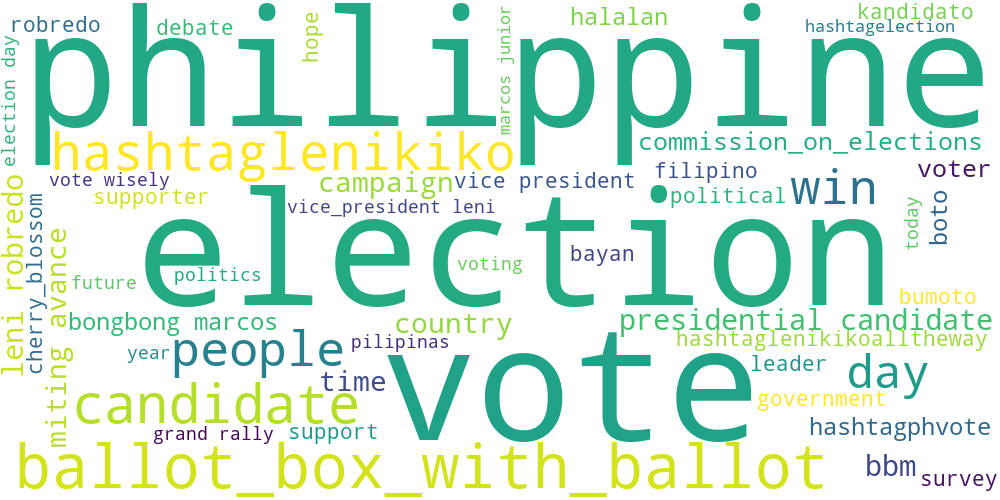

In [34]:
# The use of wordcloud to check if all steps were done correctly
from wordcloud import WordCloud

long_string = ','.join(list(dataset['Corrected_Words'].values))
wordcloud = WordCloud(background_color="white", max_words=50, contour_width=3, contour_color='steelblue',width=1000, height=500)
wordcloud.generate(long_string)
wordcloud.to_image()

## Topic Modeling

In [35]:
import gensim
from gensim import corpora
import numpy as np

documents = dataset['Corrected_Words'].values
tokenized_documents = [doc.split(",") for doc in documents] 

#Create Dictionary
id2word = corpora.Dictionary(tokenized_documents)

#Create Corpus
texts = tokenized_documents

#Term Document Frequency
corpus = [id2word.doc2bow(doc) for doc in tokenized_documents] 

In [36]:
# Build the LDA model
num_topics = 4 
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=id2word, num_topics=num_topics, passes=15,
                                            random_state=42,chunksize=50,per_word_topics=True)
for topic_id, topic_words in lda_model.print_topics():
    print(f"Topic {topic_id}: {topic_words}")

Topic 0: 0.018*" del" + 0.015*" news" + 0.010*" rally" + 0.010*" sur" + 0.010*" miting" + 0.010*" avance" + 0.009*" hashtagphvote" + 0.007*" special" + 0.007*" araw" + 0.007*" norte"
Topic 1: 0.019*" election" + 0.017*" presidential" + 0.012*" marcos" + 0.010*" campaign" + 0.009*" city" + 0.009*" voter" + 0.009*" survey" + 0.009*" commission_on_elections" + 0.008*" final" + 0.008*" senator"
Topic 2: 0.034*" philippine" + 0.013*" th" + 0.010*" leader" + 0.009*" pilipinas" + 0.006*" public" + 0.006*" red_heart" + 0.006*" people" + 0.005*" presidency" + 0.005*" hashtagphilippinesispink" + 0.005*" platform"
Topic 3: 0.031*" candidate" + 0.030*" vote" + 0.020*" election" + 0.016*" machine" + 0.015*" leni" + 0.012*" hashtagnle" + 0.012*" counting" + 0.011*" volunteer" + 0.011*" president" + 0.010*" sign"


In [37]:
document_topics = []
for doc_bow in corpus:
    topics = lda_model[doc_bow]
    document_topics.append(topics)

print(f"Topics for Pre-Election Tweets: {document_topics[0]}")

Topics for Pre-Election Tweets: ([(0, 0.1537303), (1, 0.15103875), (2, 0.028583929), (3, 0.66664696)], [(0, [3, 1]), (1, [3]), (2, [3, 0, 1]), (3, [3]), (4, [1, 3]), (5, [3]), (6, [0, 3]), (7, [3])], [(0, [(1, 0.07428205), (3, 0.9127479)]), (1, [(3, 0.9999041)]), (2, [(0, 0.11268584), (1, 0.061650664), (3, 0.7216133)]), (3, [(3, 0.9979195)]), (4, [(1, 0.949109), (3, 0.038694743)]), (5, [(3, 0.99467635)]), (6, [(0, 0.98257756), (3, 0.013110177)]), (7, [(3, 0.99316865)])])


### Coherence Score

In [38]:
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from gensim.test.utils import common_corpus, common_dictionary
from gensim.models.ldamodel import LdaModel
from gensim.models.coherencemodel import CoherenceModel

In [39]:
coherence_model_lda = CoherenceModel(model=lda_model, texts=tokenized_documents, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.37710939100482765


### Finding the Optimal Number of Topics

In [40]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=1):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=id2word, num_topics=num_topics, passes=15,
                                            random_state=42,chunksize=50,per_word_topics=True)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=lda_model, texts=tokenized_documents, dictionary=id2word, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

In [41]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=texts, start=2, limit=8, step=1)

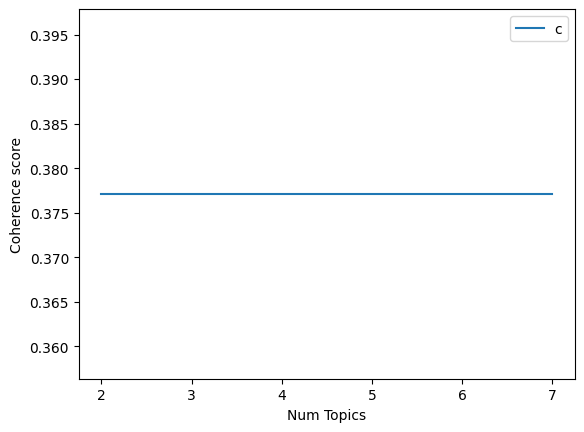

In [42]:
limit=8
start=2
step=1
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"),loc='best')
plt.show()

In [43]:
for m, cv in zip(x, coherence_values):
    print("Number of Topics =", m, "has Coherence Value of", round(cv,4))

Number of Topics = 2 has Coherence Value of 0.3771
Number of Topics = 3 has Coherence Value of 0.3771
Number of Topics = 4 has Coherence Value of 0.3771
Number of Topics = 5 has Coherence Value of 0.3771
Number of Topics = 6 has Coherence Value of 0.3771
Number of Topics = 7 has Coherence Value of 0.3771


### Topic Modeling Visualization

In [44]:
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
cloud = WordCloud(background_color='white', width=2500, height=2800, max_words=20,
                         colormap='tab10', color_func=lambda * args, **kwargs: cols[i],
                         prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)
topics

[(0,
  [(' del', 0.018037083),
   (' news', 0.014752929),
   (' rally', 0.010248794),
   (' sur', 0.009907866),
   (' miting', 0.009677273),
   (' avance', 0.009529955),
   (' hashtagphvote', 0.0085382275),
   (' special', 0.0074869283),
   (' araw', 0.0071911598),
   (' norte', 0.006875732)]),
 (1,
  [(' election', 0.018533573),
   (' presidential', 0.01695038),
   (' marcos', 0.011655923),
   (' campaign', 0.009533006),
   (' city', 0.009449944),
   (' voter', 0.00940339),
   (' survey', 0.0093347905),
   (' commission_on_elections', 0.008672512),
   (' final', 0.008444149),
   (' senator', 0.008232105)]),
 (2,
  [(' philippine', 0.03421488),
   (' th', 0.0129961455),
   (' leader', 0.00970239),
   (' pilipinas', 0.008764141),
   (' public', 0.006246923),
   (' red_heart', 0.0059092715),
   (' people', 0.005755649),
   (' presidency', 0.005400262),
   (' hashtagphilippinesispink', 0.005177804),
   (' platform', 0.005106991)]),
 (3,
  [(' candidate', 0.031040046),
   (' vote', 0.03013

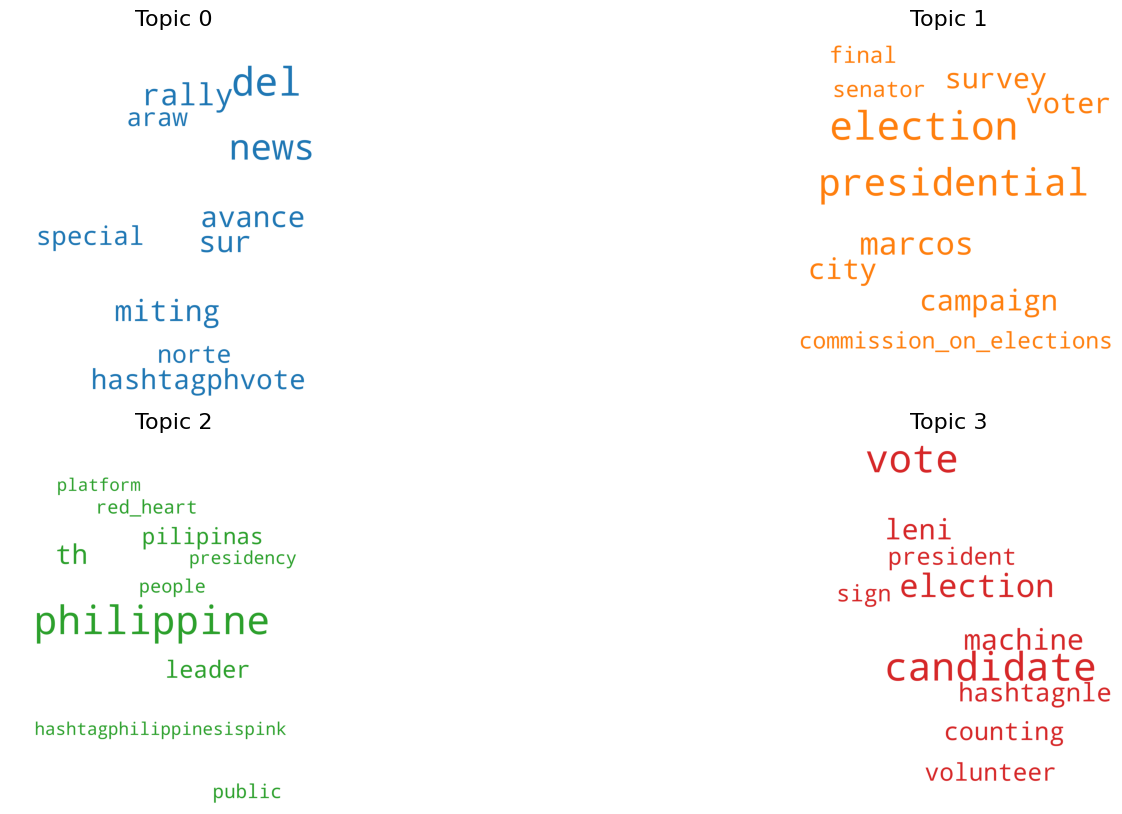

In [45]:
fig, axes = plt.subplots(2,2, figsize=(20,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words,max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic '+ str(i), fontdict=dict(size=16))
    plt.gca().axis('off')

plt.subplots_adjust(wspace=0, hspace=0.1)
plt.axis('off')
plt.margins(x=0,y=0)
plt.tight_layout
plt.show()


# Sentiment Analysis

### Emoji Sentiment Analysis

#### Create another Dataframe which contains only emojis

In [46]:
emojies_df = dataset["Emoji"]

In [47]:
emojies_df.to_frame(name="Emoji")

,Emoji
0,winking_face
1,
2,"red_heart, green_heart"
3,
4,
...,...
3954,
3955,
3956,
3957,


#### Emoji Extraction

In [48]:
#Remove whitespaces & extra commas from main emoji column to prepare for split
emojies_df = emojies_df.str.strip('')
emojies_df = emojies_df.str.strip(' ')
emojies_df = emojies_df.str.strip(',')
emojies_df

0                 winking_face
1                             
2       red_heart, green_heart
3                             
4                             
                 ...          
3954                          
3955                          
3956                          
3957                          
3958                          
Name: Emoji, Length: 3959, dtype: object

In [49]:
emojies_df = emojies_df.str.split(",",expand=True)
emojies_df

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,winking_face,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,red_heart,green_heart,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3954,,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3955,,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3956,,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3957,,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [50]:
emojies_df = emojies_df.replace(np.nan, 0)
emojies_df = emojies_df.replace('', 0)
emojies_df

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,winking_face,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,red_heart,green_heart,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3954,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3955,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3956,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3957,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
def add_colon(value):
    if value != 0:
        return f":{value}:"
    return value

emojies_df = emojies_df.map(add_colon)
emojies_df

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,:winking_face:,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,:red_heart:,: green_heart:,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3954,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3955,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3956,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3957,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
def remove_whitespace(value):
    if value != 0:
        return value.replace(" ", "")
    return value

emojies_df = emojies_df.map(remove_whitespace)
emojies_df

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,:winking_face:,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,:red_heart:,:green_heart:,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3954,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3955,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3956,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3957,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
#Renaming column names for better labelling

column_name_prefix = "Emoji_"
emojies_df.columns = [column_name_prefix + str(col) for col in emojies_df.columns]
emojies_df

,Emoji_0,Emoji_1,Emoji_2,Emoji_3,Emoji_4,Emoji_5,Emoji_6,Emoji_7,Emoji_8,Emoji_9,...,Emoji_12,Emoji_13,Emoji_14,Emoji_15,Emoji_16,Emoji_17,Emoji_18,Emoji_19,Emoji_20,Emoji_21
0,:winking_face:,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,:red_heart:,:green_heart:,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3954,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3955,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3956,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3957,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
#Transform Text to Emojis
def transform_text(value):
    if value != 0:
        value = emoji.emojize(value)
    return value 

emojies_df = emojies_df.map(transform_text)
emojies_df

,Emoji_0,Emoji_1,Emoji_2,Emoji_3,Emoji_4,Emoji_5,Emoji_6,Emoji_7,Emoji_8,Emoji_9,...,Emoji_12,Emoji_13,Emoji_14,Emoji_15,Emoji_16,Emoji_17,Emoji_18,Emoji_19,Emoji_20,Emoji_21
0,😉,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,❤️,💚,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3954,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3955,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3956,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3957,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Start of Emoji Sentiment Analysis

In [55]:
from emosent import get_emoji_sentiment_rank
def get_sentiment(emoji):
    if emoji:
        try:
            sentiment = get_emoji_sentiment_rank(emoji)
            if sentiment:
                return sentiment['sentiment_score']
            else:
                return 0
        except KeyError:
            return 0
    else:
        return 0

In [56]:
emojies_df = emojies_df.applymap(get_sentiment)
emojies_df

C:\Users\casti\AppData\Local\Temp\ipykernel_6804\889906810.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  emojies_df = emojies_df.applymap(get_sentiment)


,Emoji_0,Emoji_1,Emoji_2,Emoji_3,Emoji_4,Emoji_5,Emoji_6,Emoji_7,Emoji_8,Emoji_9,...,Emoji_12,Emoji_13,Emoji_14,Emoji_15,Emoji_16,Emoji_17,Emoji_18,Emoji_19,Emoji_20,Emoji_21
0,0.464,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,0.0,0,0,0,0,0
1,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,0.0,0,0,0,0,0
2,0.000,0.659,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,0.0,0,0,0,0,0
3,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,0.0,0,0,0,0,0
4,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,0.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3954,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,0.0,0,0,0,0,0
3955,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,0.0,0,0,0,0,0
3956,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,0.0,0,0,0,0,0
3957,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,0.0,0,0,0,0,0


In [59]:
emoji_sentiment = emojies_df.loc[:, (emojies_df!=0).any(axis=0)]
emoji_sentiment

,Emoji_0,Emoji_1,Emoji_2,Emoji_3,Emoji_4,Emoji_5,Emoji_6,Emoji_7,Emoji_8,Emoji_9,Emoji_11,Emoji_12,Emoji_13,Emoji_16
0,0.464,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000,0.659,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3954,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3955,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3956,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3957,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
